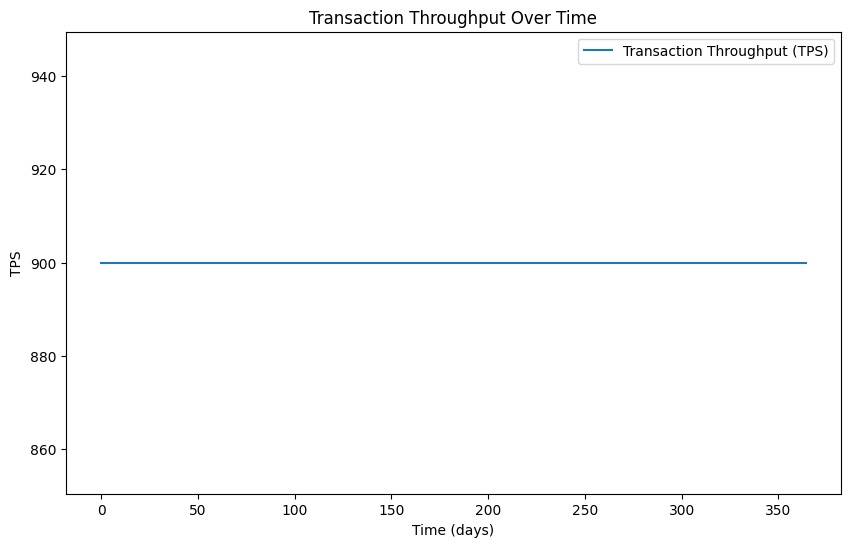

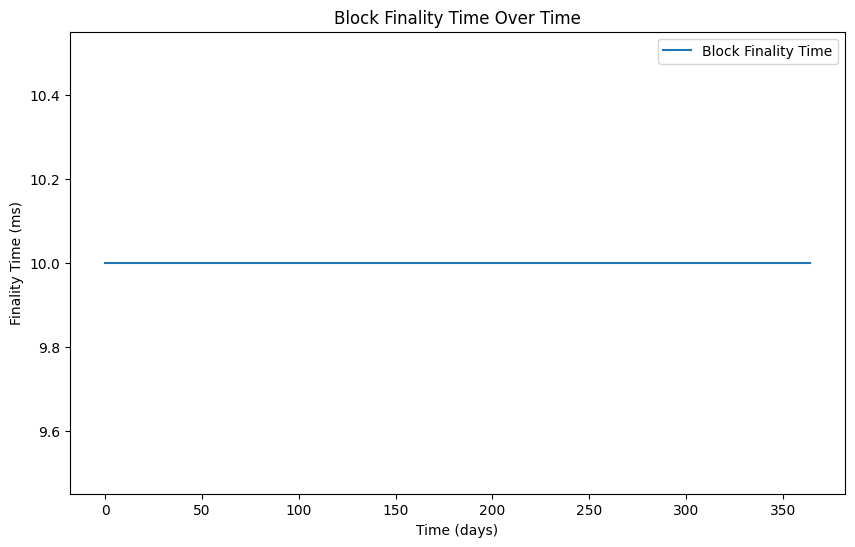

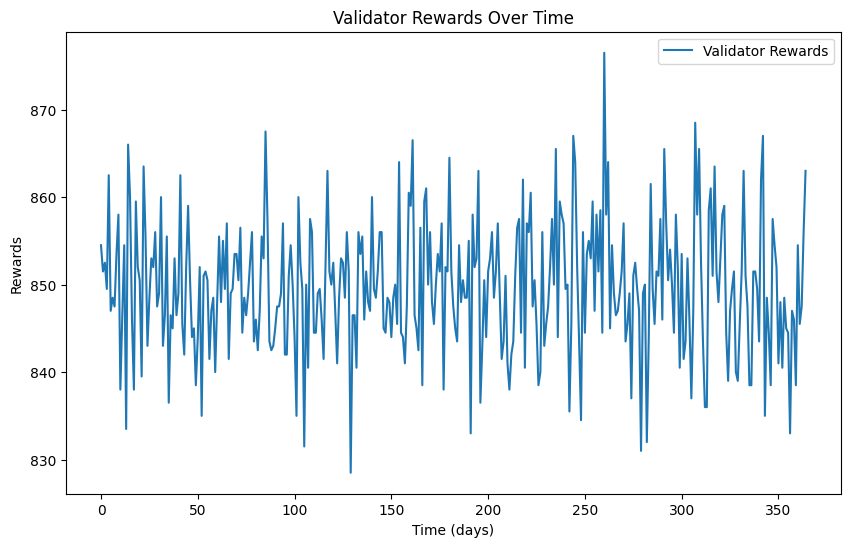

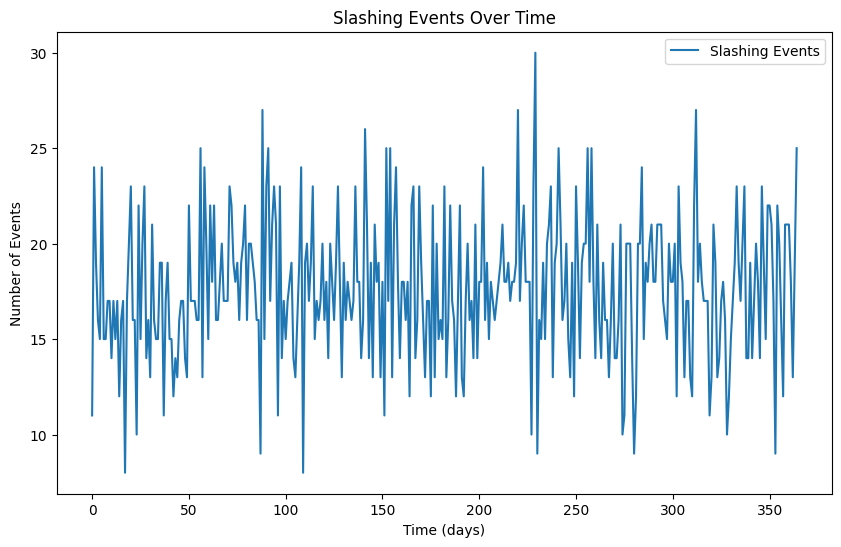

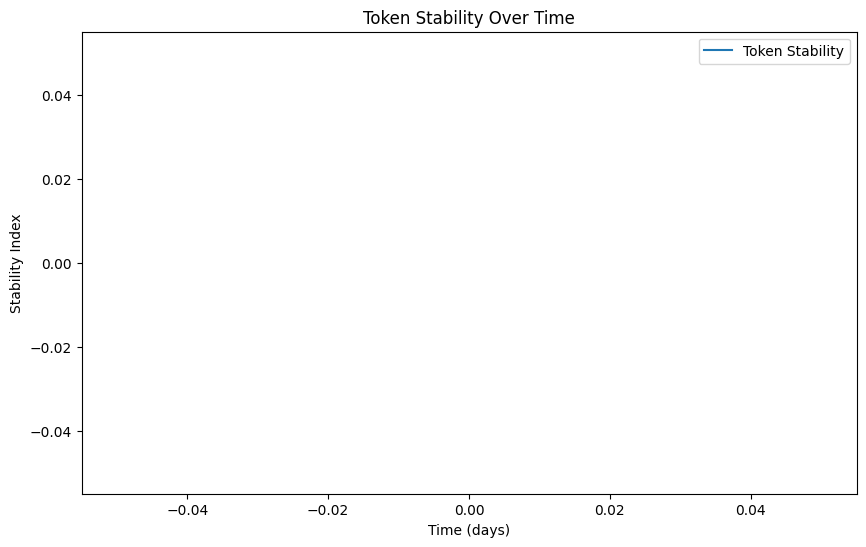

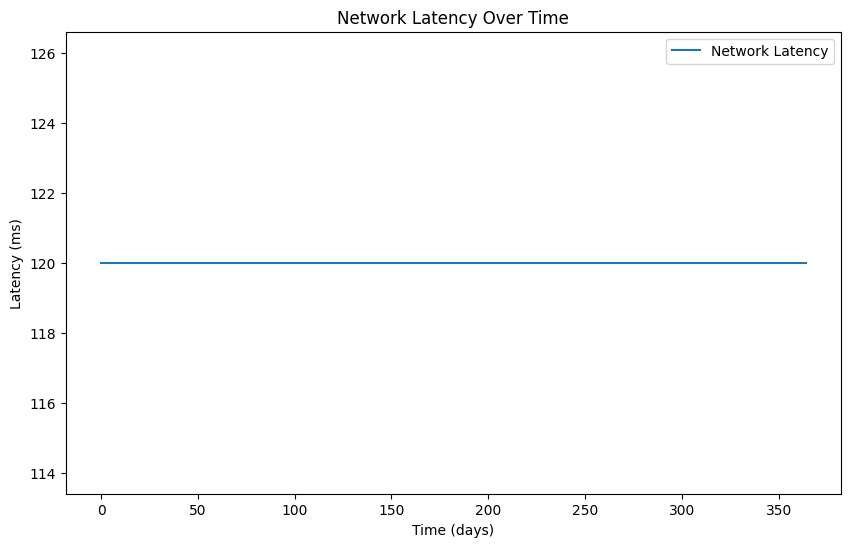

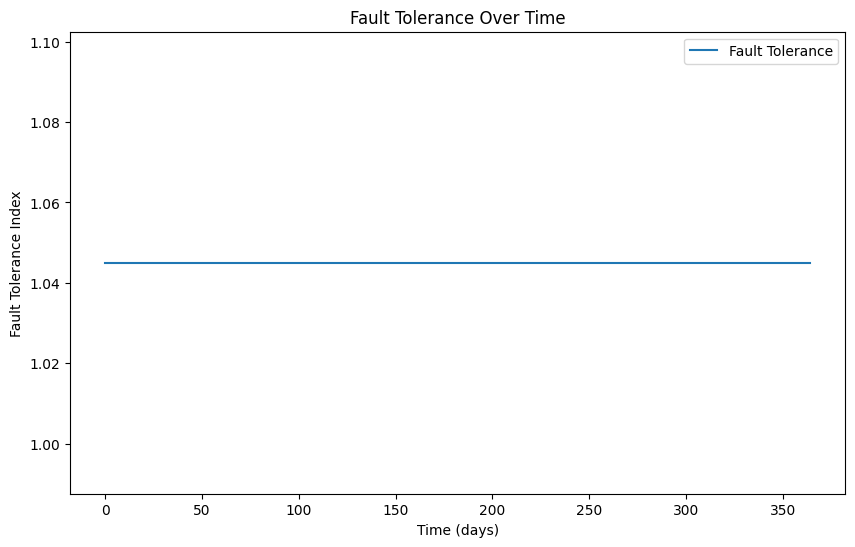

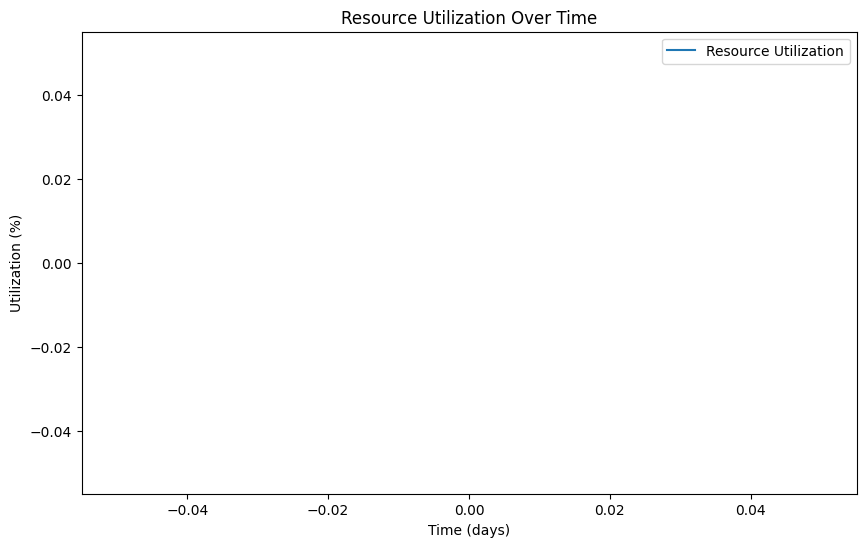

In [1]:
import sys
import os
import json
import matplotlib.pyplot as plt


# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.economic_model import EconomicModel
from simulation_engine.core.validator_config import ValidatorConfig
from simulation_engine.core.network_architecture_model import NetworkArchitectureModel
from simulation_engine.core.security_model import SecurityModel
from simulation_engine.engine.sim_engine import SimulationEngine
from simulation_engine.utils.visualization import plot_results

from experiments.evaluate_metrics import EvaluateMetrics

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../examples'))

# Function to load configuration files
def load_config_file(filename):
    return ConfigManager.load_config(os.path.join(BASE_DIR, filename))

# Load all configurations
econ_config = load_config_file('example_economic_model.json')
sec_config = load_config_file('example_security_model.json')
val_config = load_config_file('example_validator_config.json')
net_config = load_config_file('example_network_architecture_config.json')

# Initialize models with configurations
economic_model = EconomicModel(
    econ_config['total_supply'], 
    econ_config['initial_distribution'], 
    econ_config['fee_rate'],
    econ_config['transaction_volume'],
    econ_config['staking_rewards'],
    econ_config['lock_up_periods']
)

security_model = SecurityModel(sec_config['slashing_conditions'])

validator_config = ValidatorConfig(
    val_config['criteria'],
    val_config['min_stake'],
    val_config['staking_token'],
    val_config['reward_mechanisms'],
    val_config['performance_metrics']
)

network_model = NetworkArchitectureModel(
    net_config['transaction_throughput_params'],
    net_config['block_size_params'],
    net_config['consensus_params'],
    net_config['latency_params'],
    net_config['topology_params'],
    net_config['fault_tolerance_params']
)

# Run simulations
#economics = economic_model.simulate_economics()
#security = security_model.simulate_security()
#validators = validator_config.simulate_validator_config()
#network_architecture = network_model.simulate_network_architecture()
eval_metrics = EvaluateMetrics(economic_model, security_model, validator_config, network_model)

simulation_engine = SimulationEngine(eval_metrics, time_steps=365)
simulation_engine.run()